<a href="https://colab.research.google.com/github/thiagoSilvaGit/RACO/blob/master/TemplateAnalise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Tratamento da Base de dados**

##Leitura

In [ ]:
import pandas as pd

colnames = ['X_Minimum','X_Maximum','Y_Minimum','Y_Maximum','Pixels_Areas','X_Perimeter','Y_Perimeter','Sum_of_Luminosity','Minimum_of_Luminosity','Maximum_of_Luminosity','Length_of_Conveyer','TypeOfSteel_A300','TypeOfSteel_A400','Steel_Plate_Thickness','Edges_Index','Empty_Index','Square_Index','Outside_X_Index','Edges_X_Index','Edges_Y_Index','Outside_Global_Index','LogOfAreas','Log_X_Index','Log_Y_Index','Orientation_Index','Luminosity_Index','SigmoidOfAreas','Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']

spf_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00198/Faults.NNA',header=None,sep='\t', names =colnames)
spf_df['Fault'] = 0
spf_df.head()
spf_df.loc[spf_df['Pastry']==1,'Fault'] ='Pastry'
spf_df.loc[spf_df['Z_Scratch']==1,'Fault'] ='Z_Scratch'
spf_df.loc[spf_df['K_Scatch']==1,'Fault'] ='K_Scatch'
spf_df.loc[spf_df['Stains']==1,'Fault'] ='Stains'
spf_df.loc[spf_df['Dirtiness']==1,'Fault'] ='Dirtiness'
spf_df.loc[spf_df['Bumps']==1,'Fault'] ='Bumps'
spf_df.loc[spf_df['Other_Faults']==1,'Fault'] ='Other_Faults'
#spf_df.head()

#print(f'{spf_df['Fault'].value_counts()}')
spf_df.shape

(1941, 35)

## Padronização

(1941, 27)


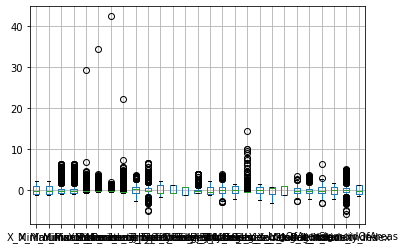

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np


X = spf_df.iloc[:,0:27]
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(X),columns = X.columns) 
print(X_std.shape)
X_std.boxplot()


## Divisão da Base

In [ ]:
from sklearn.model_selection import train_test_split

y =  spf_df.iloc[:,27:]
x = X_std
y_of = y.iloc[:,6]

#Split
xTrain, xTest, yTrain, yTest = train_test_split(x,y_of, test_size = 0.2, random_state = 0, stratify = y_of)

#verificação
print(xTrain.shape)
print(yTest.shape)
print(yTest.value_counts()/yTest.shape[0])
print(yTrain.value_counts()/yTrain.shape[0])


(1552, 27)
(389,)
0    0.652956
1    0.347044
Name: Other_Faults, dtype: float64
0    0.653351
1    0.346649
Name: Other_Faults, dtype: float64


# **Classificadores**

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.metrics import confusion_matrix as cfm
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as DTC
import graphviz
from sklearn.decomposition import KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [ ]:
X =  xTrain
y = yTrain
Xs = xTest
ys = yTest
labels = np.unique(y)

def plotcfm(mtx,lbs):
  fig,ax = plt.subplots(figsize = (8,8))
  ax.matshow(mtx,cmap =plt.cm.Blues,alpha=0.3)
  nlabel = len(mtx) 
  for i in range(nlabel):
    for j in range(nlabel):
      ax.text(x=j,y=i,s=str(mtx[i][j]),va = 'center',ha = 'center' )
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  xaxis = np.arange(len(lbs))
  ax.set_xticks(xaxis)
  ax.set_yticks(xaxis)
  ax.set_xticklabels(labels)
  ax.set_yticklabels(labels)
  return ax
def plotprobyy(yreal,pyTrue):
  fig,ax = plt.subplots(figsize = (8,8))
  sns.stripplot(yreal,pyTrue) 
  plt.xlabel('Class')
  plt.ylabel('P(y=1)')
  sns.despine()

def scatterClass(clfx,clfy,yreal,clbs):
  fig,ax = plt.subplots(figsize = (8,8))
  dfscp = pd.DataFrame({'x':clfx,'y':clfy,'yr':yreal})
  #print(dfscp[dfscp['yr'==0])
  df0 = dfscp[dfscp['yr']==0]
  df1 = dfscp[dfscp['yr']==1]

  ax.scatter(df0.iloc[:,0],df0.iloc[:,1], color='r')
  ax.scatter(df1.iloc[:,0],df1.iloc[:,1], color='b')
  plt.axvline(0.5)
  plt.axhline(0.5)
  ax.set_xlabel(clbs[0])
  ax.set_ylabel(clbs[1])
  ax.set_title('scatter plot')
  return ax

##LDA

[[225  29]
 [ 77  58]]
0.7275064267352185


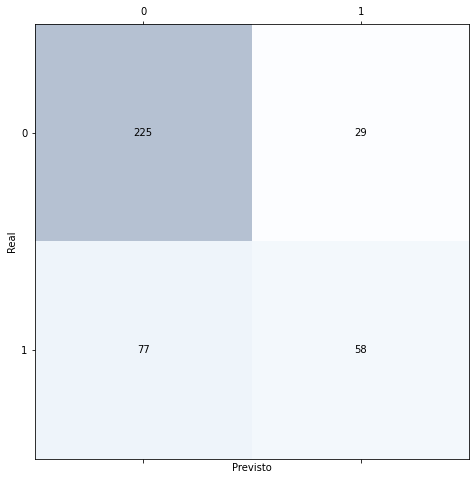

In [ ]:
lda = LDA() #cria o objeto da classe com valores padroes para os parametros 
lda.fit(X,y) # realiza o LDA na base de dados padronizada
y_pred = lda.predict(Xs)
confmtx = cfm(y_true= ys,y_pred=y_pred )
print(confmtx)
print(lda.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt


##Decision Tree

### Variáveis originais

0.7583547557840618


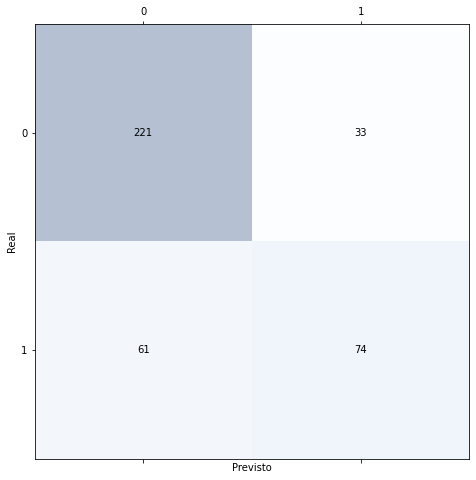

In [ ]:
clf = DTC( min_samples_leaf = 30, max_depth=5)
clf = clf.fit(X, y)
y_pred = clf.predict(Xs)
confmtx = cfm(y_true = ys,y_pred=y_pred)
print(clf.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt


### Com LDA

0.7429305912596401


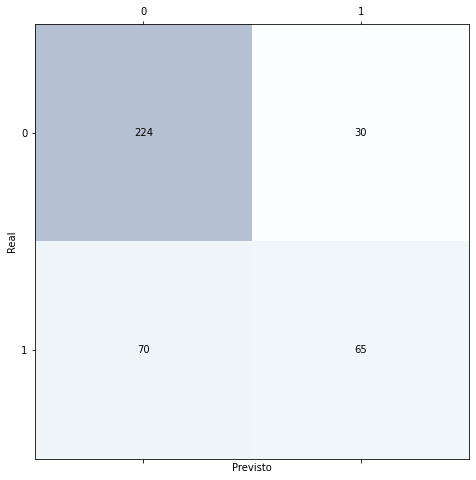

In [ ]:
pipe_dt1 = make_pipeline(LDA(), 
                        DTC(min_samples_leaf = 30, max_depth=5))

pipe_dt1.fit(X,y) 
y_pred = pipe_dt1.predict(Xs)
confmtx = cfm(y_true= ys,y_pred=y_pred )
print(pipe_dt1.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt

### Com KernelPCA

0.7789203084832905


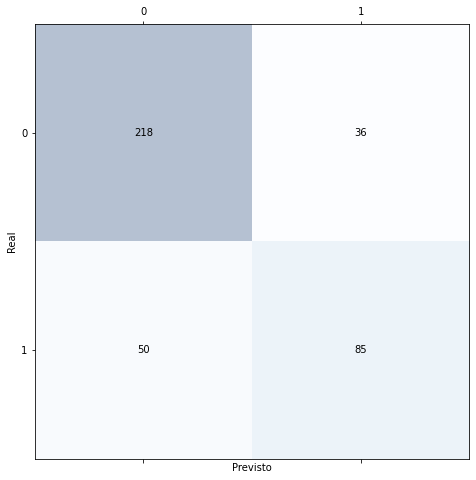

In [ ]:
pipe_dt = make_pipeline(KernelPCA(n_components=13, kernel='sigmoid'), #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’
                        DTC(max_depth=10))
pipe_dt.fit(X,y)
y_pred = pipe_dt.predict(Xs)
confmtx = cfm(y_true= ys,y_pred=y_pred )
print(pipe_dt.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt



## KNN

0.781491002570694


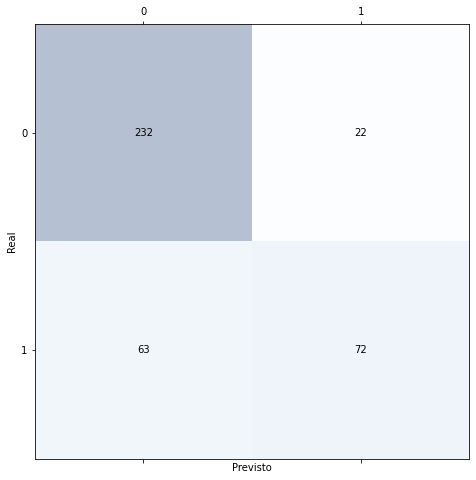

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=8)
knn_clf.fit(X, y)
y_pred = knn_clf.predict(Xs)
confmtx = cfm(y_true= ys,y_pred=y_pred )
print(knn_clf.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt

## SVM

0.7840616966580977
0.7840616966580977


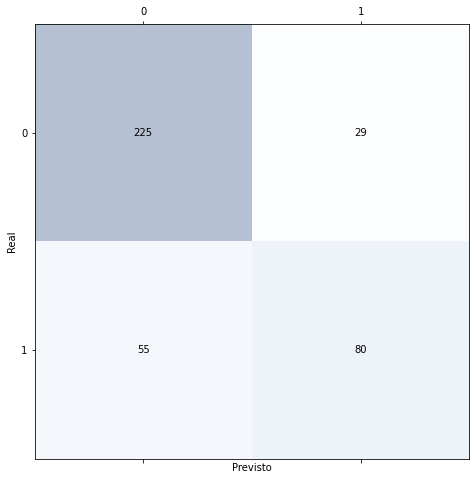

In [ ]:
svc_clf = SVC(gamma=.1, kernel='rbf', probability=True)
svc_clf.fit(X, y)
ypred = svc_clf.predict(Xs)
confmtx = cfm(y_true= ys,y_pred=ypred )
print(svc_clf.score(Xs,ys))
print(np.trace(confmtx)/ys.shape[0])
mt =  plotcfm(confmtx,labels)
mt

##Logistic Regression

0.7300771208226221


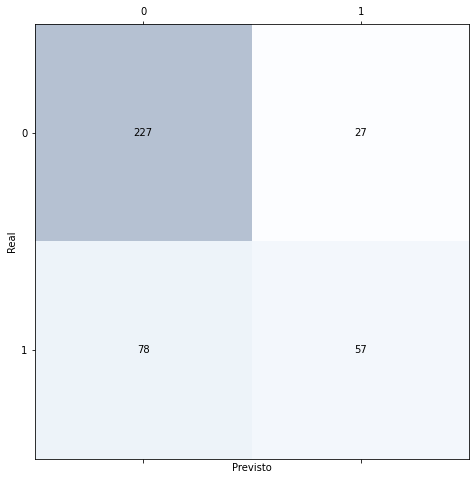

In [ ]:
lr_clf = LogisticRegression(multi_class='multinomial', random_state=1, max_iter=1000)
lr_clf.fit(X, y)
y_pred = lr_clf.predict(Xs)
confmtx = cfm(y_true= ys,y_pred=y_pred )
print(lr_clf.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt

#**Ensembles**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

## Random Forest

0.8071979434447301


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


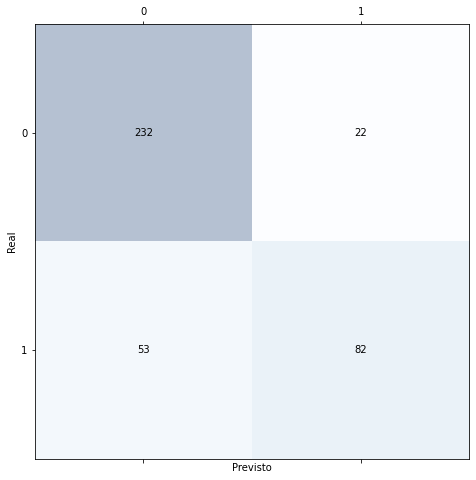

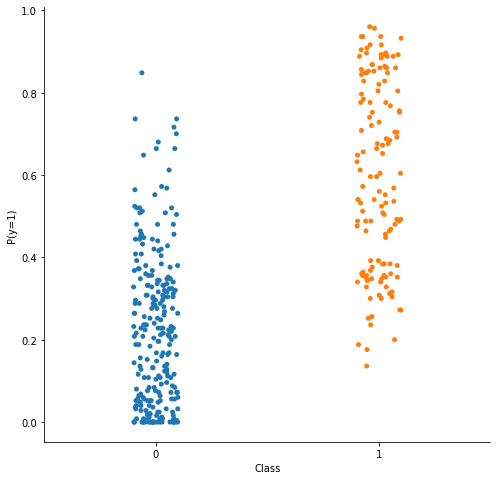

In [ ]:
rf_clf = RandomForestClassifier(n_estimators= 250, bootstrap=True,random_state =0)
rf_clf.fit(X, y)

y_pred = rf_clf.predict(Xs)
confmtx = cfm(y_true= ys,y_pred=y_pred )
print(rf_clf.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt

py = rf_clf.predict_proba(Xs)
pTrue3 = [y[1] for y in py]
ma = plotprobyy(ys,pTrue3)



## Ensemble - Voting

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.7892030848329049


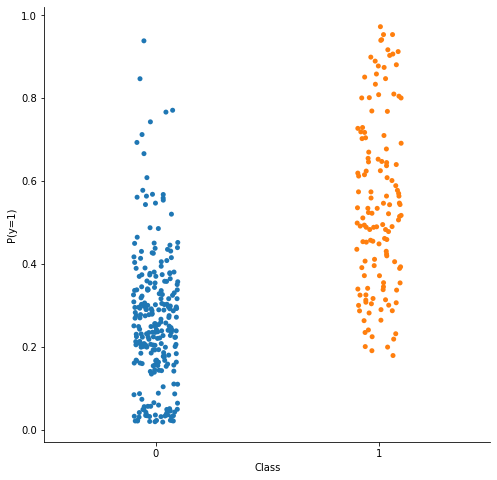

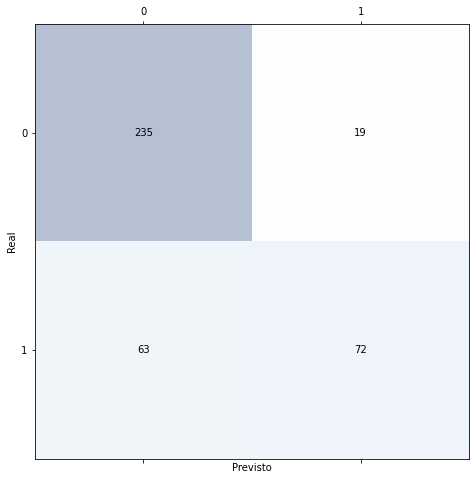

In [ ]:
'''
est = [ ('lr', lr_clf), 
       ('rf', rf_clf), 
       ('svc', svc_clf),
       ('knn', knn_clf),
       ('lda',lda),
       ('dtc',clf),
       ('lda_dt', pipe_dt1),
       ('kpca_dt',pipe_dt)]
'''
est = [('lr', lr_clf), 
       ('rf', rf_clf), 
       ('lda',lda),
       ('dtc',clf),
       ('lda_dt', pipe_dt1),
       ('kpca_dt',pipe_dt)]

e_clf = VotingClassifier(estimators=est, voting='soft')
e_clf.fit(X, y)
y_pred = e_clf.predict(Xs)
confmtx = cfm(y_true= ys,y_pred=y_pred )

py = e_clf.predict_proba(Xs)
pTrue2 = [y[1] for y in py]
ma = plotprobyy(ys,pTrue2)


print(e_clf.score(Xs,ys))
mt =  plotcfm(confmtx,labels)

#mc = scatterClass(pTrue,pTrue2,ys,['st','mvot'])



##Stacking

0.8277634961439588


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


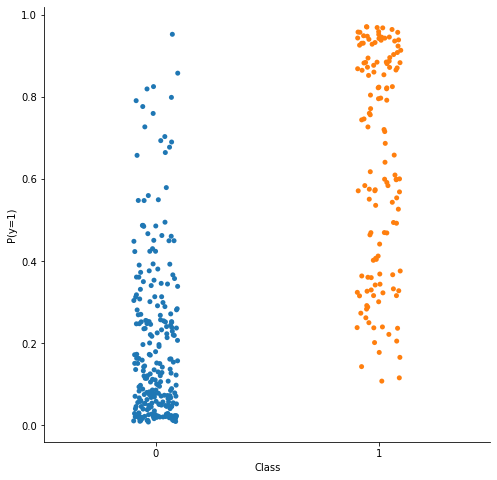

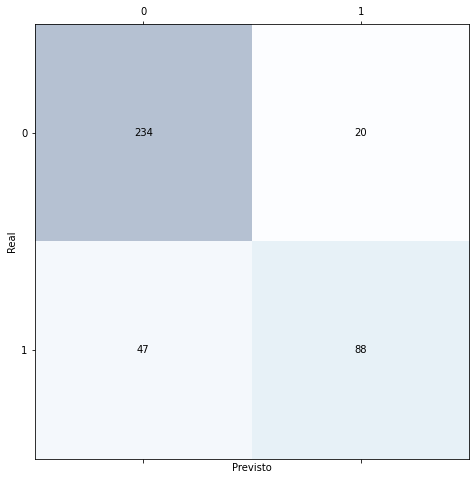

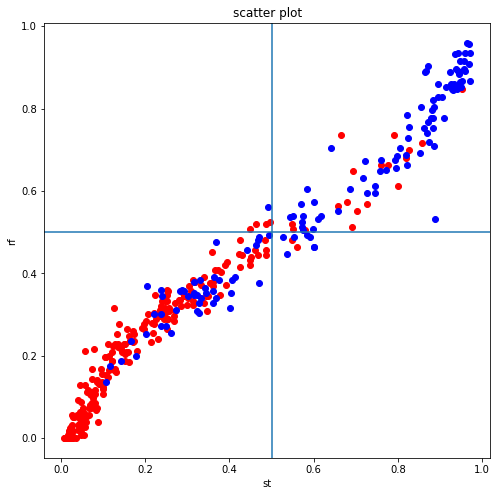

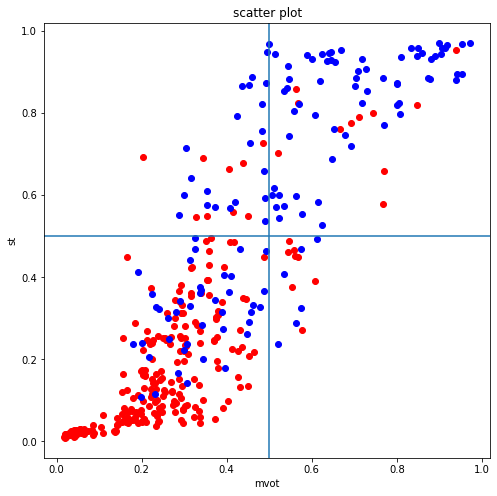

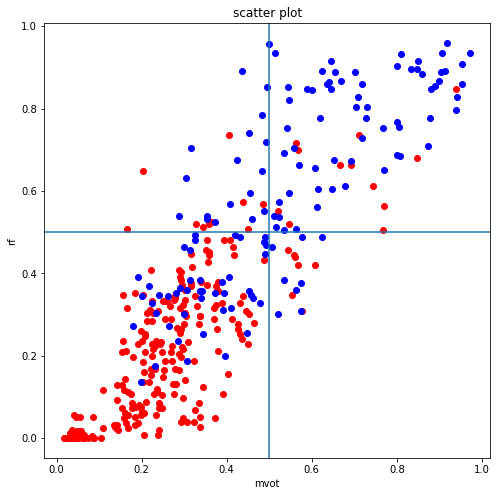

In [ ]:
est3 = [('lr', lr_clf), 
       ('lda',lda),
       ('dtc',clf),
       ('lda_dt', pipe_dt1),
       ('svc', svc_clf),
       ('knn', knn_clf)]


fest = LogisticRegression(max_iter=250) 
#fest =RandomForestClassifier(n_estimators= 250, bootstrap=True,random_state =0)
st_clf = StackingClassifier(estimators=est, 
                            final_estimator=fest, 
                            cv = 10,
                            passthrough = True)
st_clf.fit(X, y)
y_pred = st_clf.predict(Xs)
confmtx = cfm(y_true= ys,y_pred=y_pred )
print(st_clf.score(Xs,ys))

py = st_clf.predict_proba(Xs)
pTrue = [y[1] for y in py]
ma = plotprobyy(ys,pTrue)
mt =  plotcfm(confmtx,labels)

mc = scatterClass(pTrue,pTrue3,ys,['st','rf'])
mc = scatterClass(pTrue2,pTrue,ys,['mvot','st'])
mc = scatterClass(pTrue2,pTrue3,ys,['mvot','rf'])



##Bagging

###Regressão Logística

0.7326478149100257


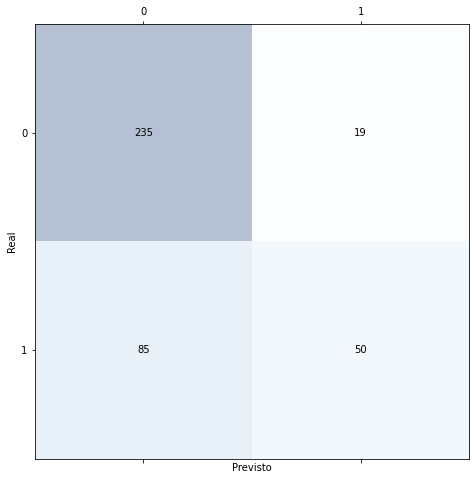

In [ ]:
lr_bgg = LogisticRegression(multi_class='multinomial', random_state=1, max_iter=1000)
bagg = BaggingClassifier(base_estimator=lr_bgg, n_estimators=250,bootstrap=True, bootstrap_features=True, random_state=0)
bagg.fit(X,y)
y_pred = bagg.predict(Xs)
confmtx = cfm(y_true=ys,y_pred=y_pred)
print(bagg.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt

### Decision Tree

0.8071979434447301


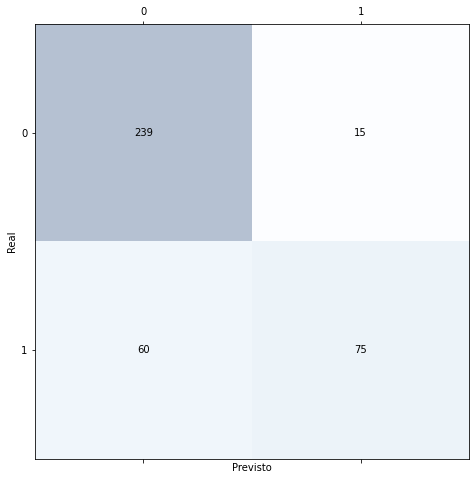

In [ ]:
pipe_dt_bgg = make_pipeline(KernelPCA(n_components=13, kernel='sigmoid'), #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘cosine’
                        DTC(max_depth=10))

bagg2 = BaggingClassifier(base_estimator=pipe_dt_bgg, n_estimators=250,bootstrap=True, bootstrap_features=True, random_state=0)
bagg2.fit(X,y)
y_pred = bagg2.predict(Xs)
confmtx = cfm(y_true=ys,y_pred=y_pred)
print(bagg2.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt

### SVM

0.7892030848329049


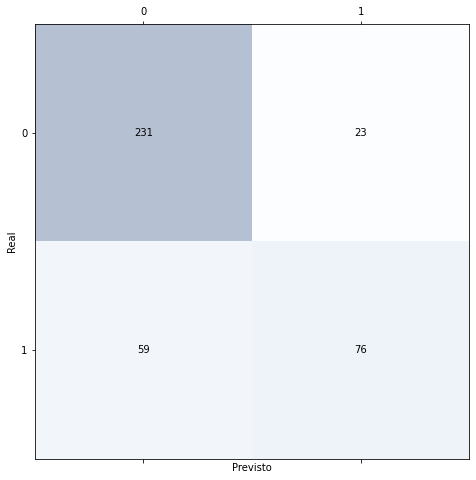

In [ ]:
svc_bgg = SVC(gamma=.1, kernel='rbf', probability=True)

bagg3 = BaggingClassifier(base_estimator=svc_bgg, n_estimators=250,bootstrap=True, bootstrap_features=True, random_state=0)
bagg3.fit(X,y)
y_pred = bagg3.predict(Xs)
confmtx = cfm(y_true=ys,y_pred=y_pred)
print(bagg3.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt

## Boosting

### Regressão Logísitica

0.7095115681233933


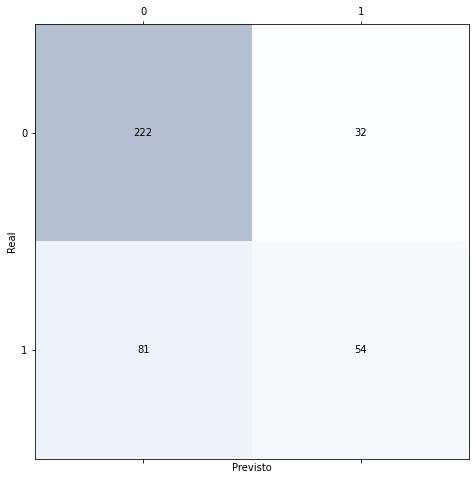

In [ ]:
lr_boo = LogisticRegression(multi_class='multinomial', random_state=1, max_iter=1000)
boost = AdaBoostClassifier(base_estimator=lr_boo, n_estimators=500,random_state=0)
boost.fit(X,y)
y_pred = boost.predict(Xs)
confmtx = cfm(y_true=ys,y_pred=y_pred)
print(boost.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt

### Decision Tree

0.7840616966580977


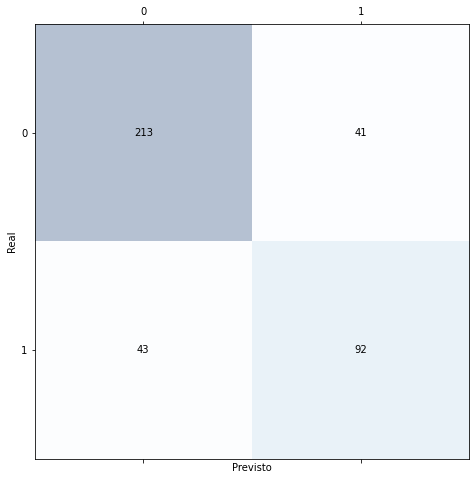

In [ ]:
dt_boo = DTC(max_depth=1)
boost2 = AdaBoostClassifier(base_estimator=dt_boo, n_estimators=500,random_state=0)
boost2.fit(X,y)
y_pred = boost2.predict(Xs)
confmtx = cfm(y_true=ys,y_pred=y_pred)
print(boost2.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt

###SVM

0.6529562982005142


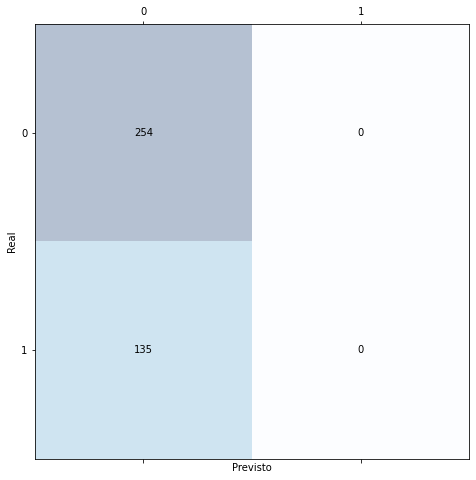

In [ ]:
svc_boo =  SVC(gamma=.1, kernel='rbf', probability=True)
boost3 = AdaBoostClassifier(base_estimator=svc_boo, n_estimators=500,random_state=0)
boost3.fit(X,y)
y_pred = boost3.predict(Xs)
confmtx = cfm(y_true=ys,y_pred=y_pred)
print(boost3.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt

#**Validação**

In [ ]:
from sklearn.model_selection import KFold
def barplot(acc,x_pos,xlabels,error,titulo = ''):
  fig, ax = plt.subplots()
  ax.bar(x_pos, acc, yerr=error, align='center', alpha=0.5, capsize=10)
  ax.set_ylabel('Erro de Generalização')
  ax.set_xticks(x_pos)
  ax.set_xticklabels(xlabels)
  ax.set_title(titulo)
  ax.yaxis.grid(True)
  ax.set_ylim([50, 100])
  
  rects = ax.patches
  labels = [f'{a:.1f}' for a in acc]

  for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
  return ax
# Save the figure and show
#plt.tight_layout()
#plt.savefig('bar_plot_with_error_bars.png')
#plt.show()

##Classificadores

In [ ]:


est1 = [('lr', lr_clf), 
       ('svc', svc_clf),
       ('knn', knn_clf),
       ('lda',lda),
       ('dtc',clf),
       ('lda_dt', pipe_dt1),
       ('kpca_dt',pipe_dt)]

np.random.seed(276) 
kfold = KFold(n_splits = 30).split(X)

lscores = []


for k,(tr, ts) in enumerate(kfold):
  x =  np.array(X.iloc[tr,0:27])
  xs =  np.array(X.iloc[ts,0:27])
  ys = np.array(y.iloc[ts])
  scoresk = []
  line = f'Fold {k:d} -  '
  for (lclf,c) in est1:
    c.fit(x,y.iloc[tr])   
    ypred = c.predict(xs)
    score = c.score(xs,ys)
    scoresk.append(score)
    line  = line + f' {lclf}:{score:.3f}\t'
  lscores.append(scoresk)
  print(line)

gsc = []
line = f'Gen err -  '
for ci,(lclf,c) in enumerate(est1):
  data = [sck[ci] for sck in lscores]
  score = np.mean(data)
  stderror = np.std(data, ddof=1) / np.sqrt(np.size(data)) 
  line  = line + f' {lclf}:{score:.3f} +/- {1.96*stderror:.3f} \t'
print(line)


Fold 0 -   lr:0.750	 svc:0.865	 knn:0.865	 lda:0.750	 dtc:0.750	 lda_dt:0.750	 kpca_dt:0.692	
Fold 1 -   lr:0.750	 svc:0.827	 knn:0.788	 lda:0.731	 dtc:0.769	 lda_dt:0.731	 kpca_dt:0.712	
Fold 2 -   lr:0.865	 svc:0.827	 knn:0.865	 lda:0.885	 dtc:0.846	 lda_dt:0.885	 kpca_dt:0.788	
Fold 3 -   lr:0.692	 svc:0.769	 knn:0.827	 lda:0.692	 dtc:0.712	 lda_dt:0.712	 kpca_dt:0.654	
Fold 4 -   lr:0.750	 svc:0.904	 knn:0.885	 lda:0.750	 dtc:0.827	 lda_dt:0.769	 kpca_dt:0.750	
Fold 5 -   lr:0.769	 svc:0.808	 knn:0.750	 lda:0.769	 dtc:0.654	 lda_dt:0.769	 kpca_dt:0.769	
Fold 6 -   lr:0.712	 svc:0.769	 knn:0.808	 lda:0.712	 dtc:0.731	 lda_dt:0.692	 kpca_dt:0.673	
Fold 7 -   lr:0.827	 svc:0.885	 knn:0.846	 lda:0.846	 dtc:0.808	 lda_dt:0.846	 kpca_dt:0.827	
Fold 8 -   lr:0.731	 svc:0.788	 knn:0.865	 lda:0.731	 dtc:0.731	 lda_dt:0.712	 kpca_dt:0.731	
Fold 9 -   lr:0.731	 svc:0.808	 knn:0.808	 lda:0.731	 dtc:0.788	 lda_dt:0.692	 kpca_dt:0.635	
Fold 10 -   lr:0.712	 svc:0.808	 knn:0.788	 lda:0.712	 dtc:0

In [ ]:
xlbs = [e[0] for e in est1]
xpos = range(len(est1))
yacc = [73.6,80,78.9,73.9,74.0,73.2,72.1]
error = [2,1.9,1.9,2.2,2.1,2.2,2.1]
titulo = 'Desempenho dos classificadores'
ax = barplot(yacc,xpos,xlbs,error,titulo = titulo)
ax

NameError: ignored

##Ensembles

In [ ]:


est2 = [('rf', rf_clf), 
       ('mvot', e_clf),
        ('stack',st_clf),
       ('bagg', bagg2),
       ('boost',boost2)]

np.random.seed(276) 
kfold = KFold(n_splits = 30).split(X)

lscores = []


for k,(tr, ts) in enumerate(kfold):
  fx =  np.array(X.iloc[tr,0:27])
  fxs =  np.array(X.iloc[ts,0:27])
  fys = np.array(y.iloc[ts])
  scoresk = []
  line = f'Fold {k:d} -  '
  for (lclf,c) in est2:
    c.fit(fx,y.iloc[tr])   
    ypred = c.predict(fxs)
    score = c.score(fxs,fys)
    scoresk.append(score)
    line  = line + f' {lclf}:{score:.3f}\t'
  lscores.append(scoresk)
  print(line)

gsc = []
line = f'Gen err -  '
for ci,(lclf,c) in enumerate(est2):
  data = [sck[ci] for sck in lscores]
  score = np.mean(data)
  stderror = np.std(data, ddof=1) / np.sqrt(np.size(data)) 
  line  = line + f' {lclf}:{score:.3f} +/- {1.96*stderror:.3f} \t'
print(line)

Fold 0 -   rf:0.846	 mvot:0.769	 stack:0.865	 bagg:0.827	 boost:0.769	
Fold 1 -   rf:0.904	 mvot:0.769	 stack:0.885	 bagg:0.846	 boost:0.827	
Fold 2 -   rf:0.923	 mvot:0.885	 stack:0.885	 bagg:0.865	 boost:0.885	
Fold 3 -   rf:0.846	 mvot:0.692	 stack:0.827	 bagg:0.788	 boost:0.769	
Fold 4 -   rf:0.865	 mvot:0.808	 stack:0.885	 bagg:0.904	 boost:0.865	
Fold 5 -   rf:0.750	 mvot:0.769	 stack:0.731	 bagg:0.750	 boost:0.635	
Fold 6 -   rf:0.808	 mvot:0.692	 stack:0.788	 bagg:0.827	 boost:0.731	
Fold 7 -   rf:0.904	 mvot:0.865	 stack:0.904	 bagg:0.904	 boost:0.827	
Fold 8 -   rf:0.788	 mvot:0.788	 stack:0.808	 bagg:0.808	 boost:0.788	
Fold 9 -   rf:0.788	 mvot:0.788	 stack:0.827	 bagg:0.788	 boost:0.808	
Fold 10 -   rf:0.788	 mvot:0.750	 stack:0.808	 bagg:0.750	 boost:0.808	
Fold 11 -   rf:0.731	 mvot:0.731	 stack:0.750	 bagg:0.750	 boost:0.712	
Fold 12 -   rf:0.865	 mvot:0.808	 stack:0.846	 bagg:0.788	 boost:0.750	
Fold 13 -   rf:0.750	 mvot:0.731	 stack:0.750	 bagg:0.712	 boost:0.769	
Fo

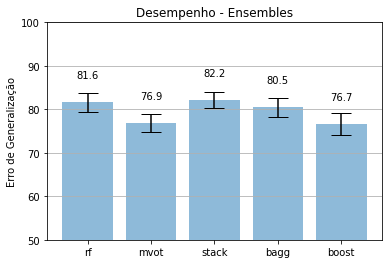

In [ ]:
xlbs = [e[0] for e in est2]
xpos = range(len(est2))
yacc = [81.6,76.9,82.2,80.5,76.7]
error = [2.2,2.1,1.9,2.2,2.5]
titulo = 'Desempenho - Ensembles'
ax = barplot(yacc,xpos,xlbs,error,titulo = titulo)
ax

#**Correlação**

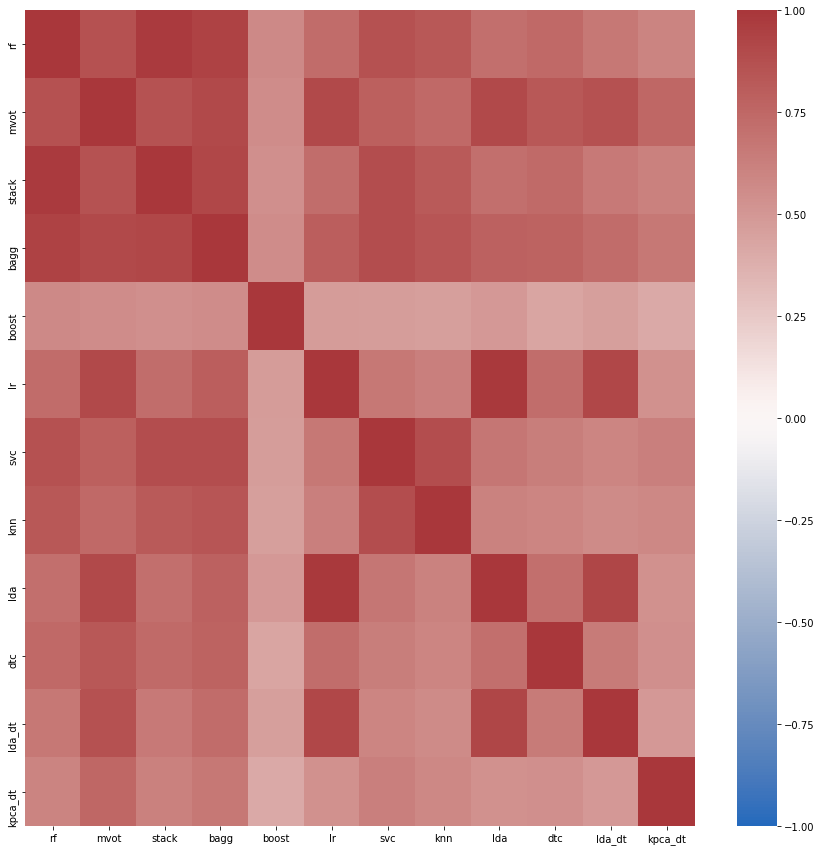

In [ ]:
from matplotlib import pyplot
import seaborn as sns

models = [('rf', rf_clf), 
       ('mvot', e_clf),
        ('stack',st_clf),
       ('bagg', bagg2),
       ('boost',boost2),
        ('lr', lr_clf), 
       ('svc', svc_clf),
       ('knn', knn_clf),
       ('lda',lda),
       ('dtc',clf),
       ('lda_dt', pipe_dt1),
       ('kpca_dt',pipe_dt)]

modeldict= {}
for m in models:
  py =  m[1].predict_proba(Xs)
  modeldict[m[0]] = [p[1] for p in py]

collbs = [m[0] for m in models]
dfmod = pd.DataFrame(modeldict, columns= collbs)
dfmod.head() 


dims = (15,15)
pyplot.figure(figsize=dims)

corr = dfmod.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, vmin=-1, vmax=1, center= 0, cmap= 'vlag')




(389,)
(389, 12)


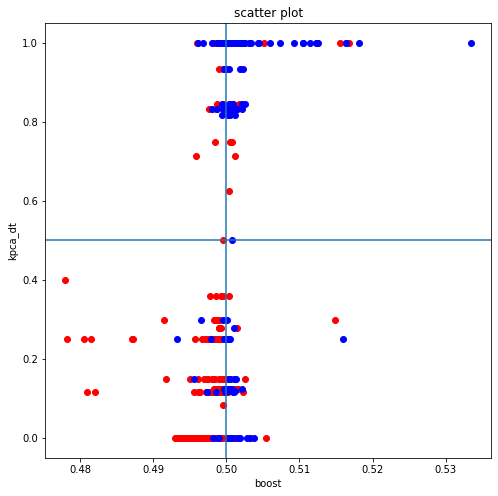

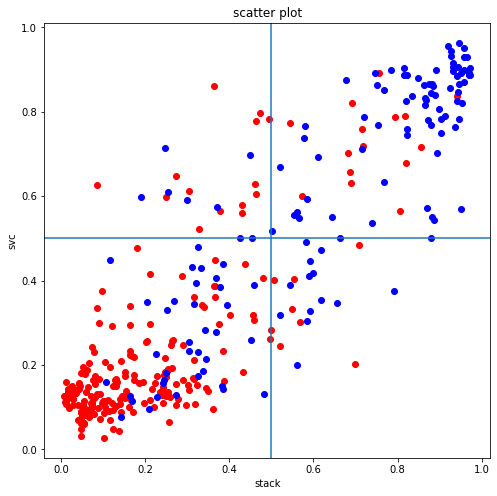

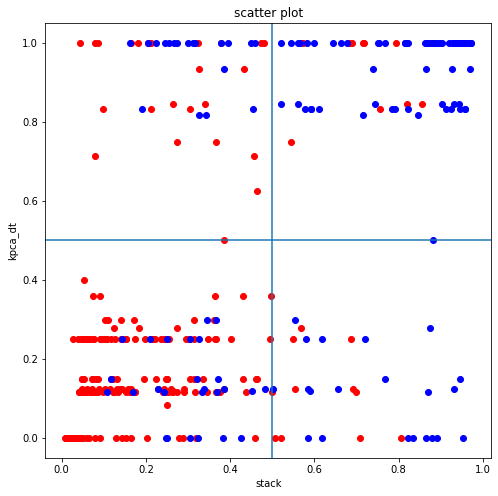

In [ ]:
print(ys.shape)
print(dfmod.shape)
mc = scatterClass(np.array(dfmod['boost']),np.array(dfmod['kpca_dt']),ys,['boost','kpca_dt'])
mc = scatterClass(np.array(dfmod['stack']),np.array(dfmod['svc']),ys,['stack','svc'])
mc = scatterClass(np.array(dfmod['stack']),np.array(dfmod['kpca_dt']),ys,['stack','kpca_dt'])

#**Tree ensemble**

In [ ]:
col = [e[0] for e in est1]

itens = {}
itens2 = {}
for e in est1:
  ye = e[1].predict(X)
  yse = e[1].predict(Xs)
  itens[e[0]] = ye
  itens2[e[0]] = yse

Z = pd.DataFrame(itens)
Zs = pd.DataFrame(itens2)

Zs.shape


(389, 7)

0.7275064267352185


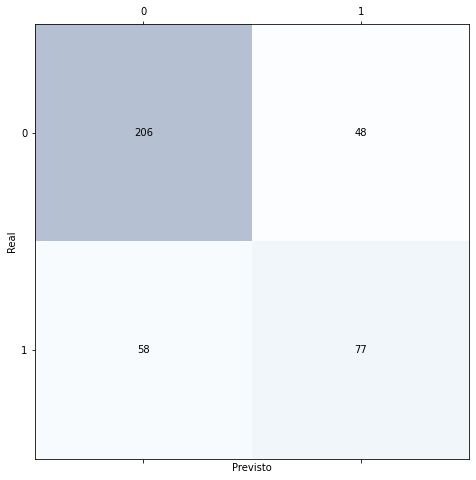

In [ ]:
ys = yTest
rf_ens = RandomForestClassifier(n_estimators= 500, bootstrap=True,random_state =0)
rf_ens.fit(Z, y)

y_pred = rf_ens.predict(Zs)
confmtx = cfm(y_true= ys,y_pred=y_pred )
print(rf_ens.score(Zs,ys))
mt =  plotcfm(confmtx,labels)
mt

#**Balanceamento**

##Resample

In [ ]:
fromutils sklearn. import resample

Xup,yup = resample(X[y==1],
                   y[y==1],
                   replace=True,
                   n_samples =X[y==0].shape[0],
                   random_state=0)
Xbal =np.vstack((X[y==0],Xup))
ybal = np.hstack((y[y==0],yup))
print(Xbal.shape)
print(Xbal[ybal==0].shape)

(2028, 27)
(1014, 27)


0.8174807197943444


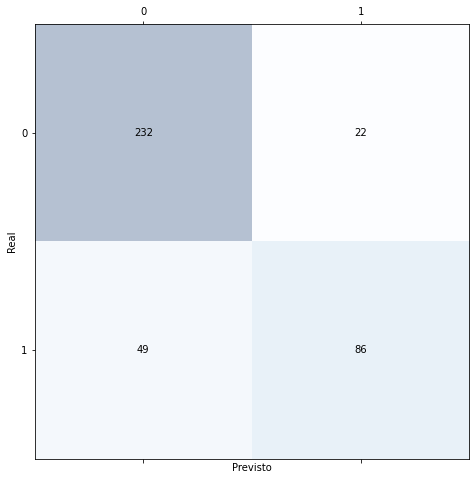

In [ ]:
rf_rs = RandomForestClassifier(n_estimators= 500, bootstrap=True,random_state =0)
rf_rs.fit(Xbal, ybal)

y_pred = rf_rs.predict(Xs)
confmtx = cfm(y_true= ys,y_pred=y_pred )
print(rf_rs.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt

##Weighting

0.8226221079691517


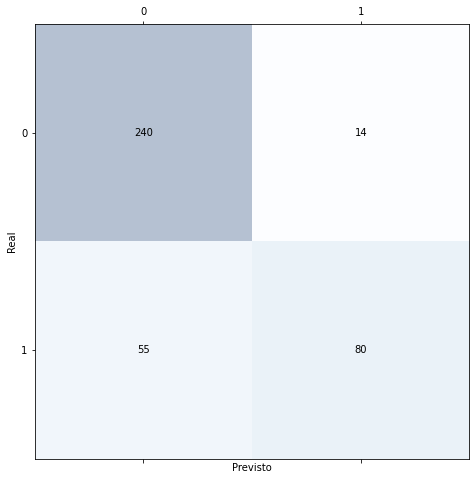

In [ ]:
ys = yTest
rf_wg = RandomForestClassifier(n_estimators= 500, class_weight={0:1,1:5}, bootstrap=True,random_state =0)
rf_wg.fit(X, y)

y_pred = rf_wg.predict(Xs)
confmtx = cfm(y_true= ys,y_pred=y_pred )
print(rf_wg.score(Xs,ys))
mt =  plotcfm(confmtx,labels)
mt

#Validação

In [ ]:
from sklearn.model_selection import KFold

est3 = [('rs', rf_rs), 
       ('wg', rf_wg)]

np.random.seed(276) 
kfold = KFold(n_splits = 30).split(X)

lscores = []


for k,(tr, ts) in enumerate(kfold):
  x =  np.array(X.iloc[tr,0:27])
  xs =  np.array(X.iloc[ts,0:27])
  ys = np.array(y.iloc[ts])
  scoresk = []
  line = f'Fold {k:d} -  '
  for (lclf,c) in est3:
    c.fit(x,y.iloc[tr])   
    ypred = c.predict(xs)
    score = c.score(xs,ys)
    scoresk.append(score)
    line  = line + f' {lclf}:{score:.3f}\t'
  lscores.append(scoresk)
  print(line)

gsc = []
line = f'Gen err -  '
for ci,(lclf,c) in enumerate(est3):
  data = [sck[ci] for sck in lscores]
  score = np.mean(data)
  stderror = np.std(data, ddof=1) / np.sqrt(np.size(data)) 
  line  = line + f' {lclf}:{score:.3f} +/- {1.96*stderror:.3f} \t'
print(line)

Fold 0 -   rs:0.846	 wg:0.865	
Fold 1 -   rs:0.904	 wg:0.904	
Fold 2 -   rs:0.923	 wg:0.904	
Fold 3 -   rs:0.846	 wg:0.827	
Fold 4 -   rs:0.904	 wg:0.904	
Fold 5 -   rs:0.731	 wg:0.769	
Fold 6 -   rs:0.808	 wg:0.788	
Fold 7 -   rs:0.904	 wg:0.923	
Fold 8 -   rs:0.788	 wg:0.827	
Fold 9 -   rs:0.788	 wg:0.846	
Fold 10 -   rs:0.788	 wg:0.788	
Fold 11 -   rs:0.712	 wg:0.712	
Fold 12 -   rs:0.865	 wg:0.846	
Fold 13 -   rs:0.750	 wg:0.731	
Fold 14 -   rs:0.769	 wg:0.769	
Fold 15 -   rs:0.788	 wg:0.788	
Fold 16 -   rs:0.808	 wg:0.827	
Fold 17 -   rs:0.712	 wg:0.712	
Fold 18 -   rs:0.865	 wg:0.846	
Fold 19 -   rs:0.827	 wg:0.846	
Fold 20 -   rs:0.865	 wg:0.904	
Fold 21 -   rs:0.827	 wg:0.788	
Fold 22 -   rs:0.784	 wg:0.784	
Fold 23 -   rs:0.784	 wg:0.745	
Fold 24 -   rs:0.902	 wg:0.843	
Fold 25 -   rs:0.765	 wg:0.784	
Fold 26 -   rs:0.804	 wg:0.804	
Fold 27 -   rs:0.882	 wg:0.843	
Fold 28 -   rs:0.765	 wg:0.745	
Fold 29 -   rs:0.725	 wg:0.745	
Gen err -   rs:0.814 +/- 0.022 	 wg:0.814 +/- 0.02